In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

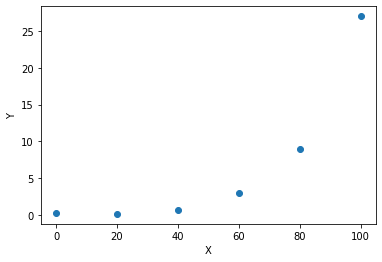

In [2]:
# Создадим набор данных с кубической зависимостью между  x и y

x = np.array([0, 20, 40, 60, 80, 100]).reshape(-1, 1)
y = 100*np.array([0.002, 0.0012, 0.006, 0.03, 0.09, 0.27]).reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Попробуем на этих данных линейную регрессию


Mean Absolute Error: 4.78247619047619
Mean Squared Error: 29.01164698412698
Root Mean Squared Error: 5.386246093906867

R2:  0.6856885318071759


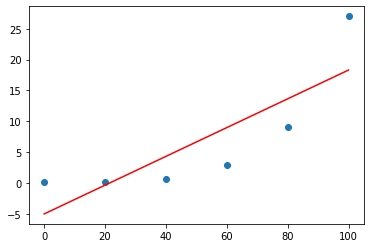

In [3]:
# Импортируем модель линейной регрессии из модуля linear_model
from sklearn.linear_model import LinearRegression

# Импортируем из модуля sklearn.metrics все классы для дальнейшего использования
from sklearn.metrics import * 

# Создаем объект модели линейной регресии
lin_regr = LinearRegression()
# Тренируем модель на входных данных при помощи метода fit()
lin_regr.fit(x, y)
# Получаем предсказание значений у при помощи метода predict()
y_pred = lin_regr.predict(x)

# Построим график линейной регрессии
plt.scatter(x,y)
plt.plot(x, x*lin_regr.coef_+lin_regr.intercept_, color='red')


# Посчитаем ошибки MAE, MSE и RMSE
print('\nMean Absolute Error:', mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, y_pred)))

# Посчитаем R^2
r2 = r2_score(y, y_pred)
print('\nR2: ', r2)

#  Пробуем полиномиальную регрессию

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import * 

# Полиномиальная регрессия выполняется также при помощи класса LinearRegression, однако каждая точка
# должна быть трансформирована в n-ное пространство, где n - это наивысшая степень многочлена, которую вы хотите использовать
# Для трансформации каждой точки импортируем класс PolynomialFeatures из модуля preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Создадим модель для полиномиальной трансформации данных. Degree обозначает наивысшую степень многочлена
poly_feat= PolynomialFeatures(degree=5)

# При помощи метода fit_transform() отправим данные в трансформатор и преобразуем их
x_poly = poly_feat.fit_transform(x)

# Создаем объект модели линейной регресии, которая будет применяться на трансформированных данных
model_poly = LinearRegression()

# Тренируем модель на трансформированных данных при помощи метода fit()
model_poly.fit(x_poly, y)

# Получаем предсказание значений у для трансформированных данных при помощи метода predict()
y_poly_pred = model_poly.predict(x_poly)

In [5]:
# Посчитаем ошибки MAE, MSE и RMSE
print('\nMean Absolute Error:', mean_absolute_error(y, y_poly_pred))  
print('Mean Squared Error:', mean_squared_error(y, y_poly_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, y_poly_pred)))

# Посчитаем R^2
r2 = r2_score(y, y_pred)
print('\nR2: ', r2)


Mean Absolute Error: 2.300941479016494e-08
Mean Squared Error: 9.10526271688817e-16
Root Mean Squared Error: 3.017492786551141e-08

R2:  0.6856885318071759


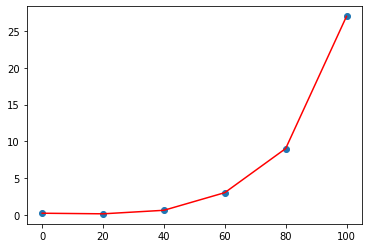

In [6]:
# Посчитаем значение y для построения графика
y_poly_plot = x_poly*model_poly.coef_+model_poly.intercept_
# plt.plot(x, y_poly_pred)

# Построим график полиномиальной регрессии
plt.scatter(x,y)
plt.plot(x, y_poly_pred, color='red')
plt.show()